In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def create_data(file_name: str = 'two_circle.txt') -> np.array:
    dataset = []
    with open(file_name, 'r') as text:
        for line in text.readlines():
            _x, _y, _label = line.split()
            dataset.append((float(_x), float(_y), int(_label)))
    return np.array(dataset)

In [3]:
class Knn:
    def __init__(self, num_neighbors: int, norm: int):
        self.l = num_neighbors
        self.p = norm
    
    def fit_predict(self,train,test):
        
        pred = self.predict(train, test)
        actual = [point[-1] for point in test]
        acc = self.accuracy(actual, pred)
        error=self.mse(actual,pred)
        return error, acc

    def predict(self, train, test):
        predictions = list()
        for row in test:
            output = self.predict_class(train, row)
            predictions.append(output)
        return predictions

    def predict_class(self, train, test_row):
        neighbors = self.get_neighbors(train, test_row)
        output_values = [row[-1] for row in neighbors]
        prediction = max(set(output_values), key=output_values.count)
        return prediction

    def mse(self, real, output) -> float:
        """
        Calculate the mean square error of predicted label data and the real label data
        """
        return ((np.array(real) - np.array(output)) ** 2).mean()

    def get_neighbors(self, train, test_row):
        distances = list()
        for train_row in train:
            dist = self.caculate_distance(test_row, train_row)
            distances.append((train_row, dist))
        distances.sort(key=lambda tup: tup[1])
        neighbors = list()
        for i in range(self.l):
            neighbors.append(distances[i][0])
        return neighbors

    def accuracy(self, actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0

    def caculate_distance(self, x, y):
        dist=np.linalg.norm(x[:2] - y[:2], ord=self.p)
        return dist

In [4]:
n_neis = [1, 3, 5, 7, 9]
norms = [1, 2, np.inf]

data = create_data()
errors = np.zeros(shape=(len(norms), len(n_neis)))
scores = np.zeros(shape=(len(norms), len(n_neis)))
errors_train = np.zeros(shape=(len(norms), len(n_neis)))
scores_train = np.zeros(shape=(len(norms), len(n_neis)))

for k in range(100):
    for i in range(len(norms)):
        for j in range(len(n_neis)):
            
            train, test = train_test_split(data, test_size=0.5)  # 0.5 is 75 points of the data (50% of 150 points)
            clf = Knn(num_neighbors=n_neis[j], norm=norms[i])
            
            error, acc = clf.fit_predict(train,test)
            error_t, acc_t = clf.fit_predict(train,train)
            
            errors_train[i][j] += error_t
            scores_train[i][j] += acc_t
            errors[i][j] += error
            scores[i][j] += acc

In [5]:
errors_train /= 100
scores_train /= 100
errors /= 100
scores /= 100

## Train

In [6]:
errors_train

array([[0.        , 0.0176    , 0.03946667, 0.04533333, 0.04853333],
       [0.        , 0.01706667, 0.0352    , 0.03893333, 0.06186667],
       [0.        , 0.0224    , 0.0496    , 0.064     , 0.07946667]])

In [7]:
best_k = 0
best_p = 0
best_norm = np.inf
for p, norms in enumerate(errors_train):
    for k, norm in enumerate(norms):
        if norm < best_norm:
            best_norm = norm
            best_p = p
            best_k = k
best_p += 1
if best_p == 3:
    best_p = np.inf
print(f"Best k is: {best_k * 2 + 1} and p is: {best_p} by minimum ERROR, with norm: {best_norm}")

Best k is: 1 and p is: 1 by minimum ERROR, with norm: 0.0


In [8]:
scores_train

array([[100.        ,  99.56      ,  99.01333333,  98.86666667,
         98.78666667],
       [100.        ,  99.57333333,  99.12      ,  99.02666667,
         98.45333333],
       [100.        ,  99.44      ,  98.76      ,  98.4       ,
         98.01333333]])

In [9]:
best_k = 0
best_p = 0
best_norm = 0
for p, norms in enumerate(scores_train):
    for k, norm in enumerate(norms):
        if norm > best_norm:
            best_norm = norm
            best_p = p
            best_k = k
            
best_p += 1
if best_p == 3:
    best_p = np.inf
print(f"Best k is {best_k * 2 + 1} and p is: {best_p} by maximum SCORE, with norm: {best_norm}")

Best k is 1 and p is: 1 by maximum SCORE, with norm: 100.0


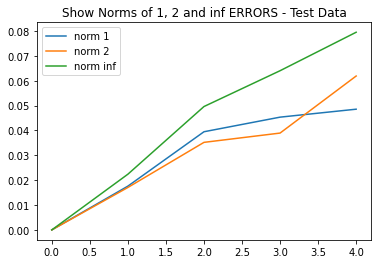

In [10]:
plt.plot(errors_train[0],label="norm 1")
plt.plot(errors_train[1],label="norm 2")
plt.plot(errors_train[2],label="norm inf")
plt.legend(loc="upper left")
plt.title("Show Norms of 1, 2 and inf ERRORS - Train Data")
plt.show()

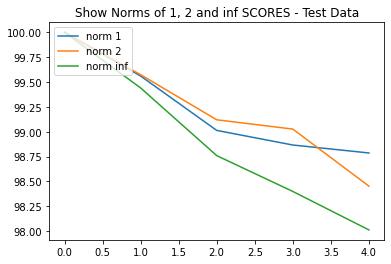

In [11]:
plt.plot(scores_train[0],label="norm 1")
plt.plot(scores_train[1],label="norm 2")
plt.plot(scores_train[2],label="norm inf")
plt.legend(loc="upper left")
plt.title("Show Norms of 1, 2 and inf SCORES - Train Data")
plt.show()

## Test

In [12]:
errors

array([[0.04373333, 0.05866667, 0.07786667, 0.09066667, 0.0816    ],
       [0.04693333, 0.0704    , 0.09173333, 0.08693333, 0.104     ],
       [0.05973333, 0.09066667, 0.11093333, 0.13226667, 0.13866667]])

In [13]:
best_k = 0
best_p = 0
best_norm = np.inf
for p, norms in enumerate(errors):
    for k, norm in enumerate(norms):
        if norm < best_norm:
            best_norm = norm
            best_p = p
            best_k = k
best_p += 1
if best_p == 3:
    best_p = np.inf
print(f"Best k is: {best_k * 2 + 1} and p is: {best_p} by minimum ERROR, with norm: {best_norm}")

Best k is: 1 and p is: 1 by minimum ERROR, with norm: 0.043733333333333305


In [14]:
scores

array([[98.90666667, 98.53333333, 98.05333333, 97.73333333, 97.96      ],
       [98.82666667, 98.24      , 97.70666667, 97.82666667, 97.4       ],
       [98.50666667, 97.73333333, 97.22666667, 96.69333333, 96.53333333]])

In [15]:
best_k = 0
best_p = 0
best_norm = 0
for p, norms in enumerate(scores):
    for k, norm in enumerate(norms):
        if norm > best_norm:
            best_norm = norm
            best_p = p
            best_k = k
            
best_p += 1
if best_p == 3:
    best_p = np.inf
print(f"Best k is {best_k * 2 + 1} and p is: {best_p} by maximum SCORE, with norm: {best_norm}")

Best k is 1 and p is: 1 by maximum SCORE, with norm: 98.90666666666668


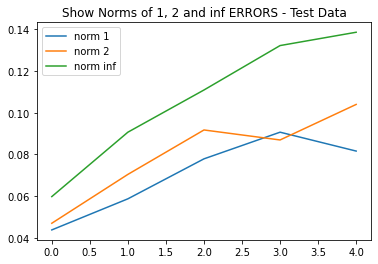

In [16]:
plt.plot(errors[0],label="norm 1")
plt.plot(errors[1],label="norm 2")
plt.plot(errors[2],label="norm inf")
plt.legend(loc="upper left")
plt.title("Show Norms of 1, 2 and inf ERRORS - Test Data")
plt.show()

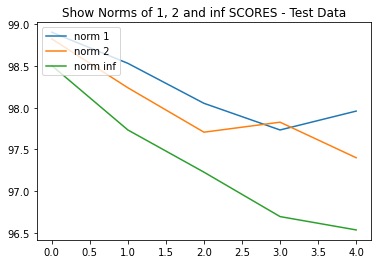

In [17]:
plt.plot(scores[0],label="norm 1")
plt.plot(scores[1],label="norm 2")
plt.plot(scores[2],label="norm inf")
plt.legend(loc="upper left")
plt.title("Show Norms of 1, 2 and inf SCORES - Test Data")
plt.show()